In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe

# 1. Run Normal CFE Simulations

In [2]:
cfe_instance = bmi_cfe.BMI_CFE('./cat58_config_cfe.json')
cfe_changing = bmi_cfe.BMI_CFE('./cat58_config_cfe.json')

In [3]:
cfe_instance.initialize()
cfe_changing.initialize()

In [4]:
np.random.seed(0)

In [5]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
outputs_changing = cfe_changing.get_output_var_names()

output_lists = {output:[] for output in outputs}
output_lists_changing = {output:[] for output in outputs_changing}

sm_hist = []
flux_lat_m =[]
flux_overland_m = []
flux_perc_m = []
direct_runoff = []
flux_giuh_runoff_m = []

for precip in df_forcing['APCP_surface']:
    
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    cfe_changing.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)

    cfe_instance.update()
    
    sm_w_error = cfe_instance.get_value("DIRECT_RUNOFF") * np.random.normal(1.5, 0.4, 1)[0] # added noise to check if it produces different output.
    sm_hist.append(sm_w_error) # to track the states
    cfe_changing.set_value("DIRECT_RUNOFF", sm_w_error)
    cfe_changing.update()

    direct_runoff.append(cfe_changing.get_value("DIRECT_RUNOFF"))
    
    for output in outputs:
    
        output_lists[output].append(cfe_instance.get_value(output))
        output_lists_changing[output].append(cfe_changing.get_value(output))

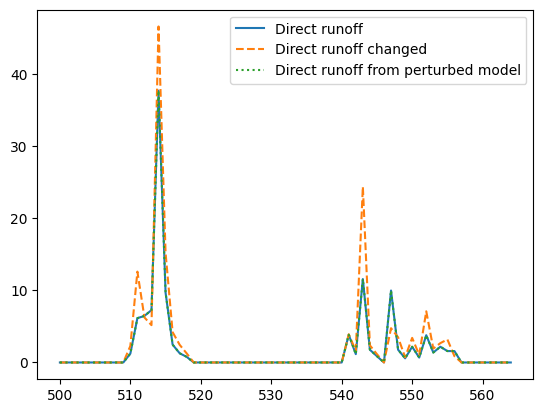

In [6]:
plt.plot(df_forcing.index.values[500:565], output_lists['DIRECT_RUNOFF'][500:565], linestyle = '-', label="Direct runoff")
plt.plot(df_forcing.index.values[500:565], sm_hist[500:565], linestyle = '--', label="Direct runoff changed")
plt.plot(df_forcing.index.values[500:565], output_lists_changing['DIRECT_RUNOFF'][500:565], linestyle = ':', label="Direct runoff from perturbed model")
plt.legend()

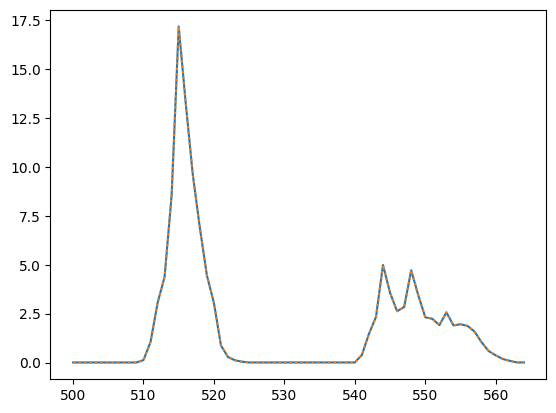

In [7]:
plt.plot(df_forcing.index.values[500:565], output_lists_changing['land_surface_water__runoff_depth'][500:565])
plt.plot(df_forcing.index.values[500:565], output_lists['land_surface_water__runoff_depth'][500:565], linestyle = ':')